# Modelagem Preditiva e Análise Exploratória de Consumo Elétrico Residencial

Este estudo utiliza o conjunto de dados *Household Electricity Consumption Data* (Kaggle) para investigar os padrões de consumo energético em residências e aplicar técnicas de aprendizado de máquina voltadas à previsão de demanda elétrica.  

O dataset contém aproximadamente **240.000 registros** e **7 variáveis principais**, abrangendo medições de potência, tensão e consumo parcial em diferentes áreas de uma residência.  

As colunas incluem:  

- **Date e Time** — informações temporais que permitem a análise de variações horárias e sazonais.  
- **Global_active_power e Global_reactive_power** — medidas de potência ativa e reativa consumidas (em kW e kVAR).  
- **Voltage e Global_intensity** — tensão e corrente elétrica durante o consumo.  
- **Sub_metering_1, Sub_metering_2, Sub_metering_3** — consumo específico em diferentes circuitos da casa (cozinha, lavanderia e climatização).  

---

## Objetivos

- Realizar **análise exploratória de dados (EDA)** para compreender os padrões de consumo elétrico ao longo do tempo.  
- Identificar **relações entre variáveis elétricas** (potência, tensão e corrente).  
- Aplicar **modelos de regressão** baseados em *machine learning* (XGBoost) para prever o consumo energético total.  
- Avaliar o desempenho preditivo por meio de métricas como **RMSE** e **R²**.  
- Gerar **insights aplicáveis à eficiência energética** e ao monitoramento inteligente do uso residencial.  

---

## Metodologia

- **Pré-processamento dos dados:** limpeza, verificação de valores nulos, conversão de tipos e análise estatística descritiva.  
- **Exploração visual:** uso de gráficos de dispersão, histogramas e heatmaps de correlação para identificar padrões entre potência, tensão e consumo.  
- **Modelagem preditiva:**  
  - Utilização do **XGBoost Regressor** para previsão do consumo ativo global.  
  - Treinamento e avaliação do modelo com validação por erro quadrático médio (RMSE).  
- **Interpretação dos resultados:** análise da importância das variáveis e verificação de possíveis correlações entre os submeterings e o consumo total.  

---

## Importância do Estudo

A análise fornece uma visão detalhada sobre o comportamento do **consumo elétrico residencial**, permitindo identificar horários e fatores que mais influenciam o gasto energético.  

O uso de técnicas de **aprendizado de máquina** — como o XGBoost — demonstra o potencial da **Ciência de Dados aplicada à energia**, possibilitando o desenvolvimento de sistemas inteligentes para previsão de consumo e gestão eficiente de recursos elétricos.  

Esses resultados contribuem para soluções voltadas à **sustentabilidade**, **automação residencial** e **otimização de consumo**, promovendo maior conscientização e eficiência energética no contexto doméstico.


# Household Electricity Consumption Data

O conjunto de dados utilizado neste estudo refere-se a **registros detalhados de consumo elétrico residencial**, abrangendo **mais de 240.000 medições individuais** coletadas de residências ao longo do tempo. Ele contém informações sobre o **uso de energia elétrica** em diferentes componentes domésticos e variáveis que permitem analisar o comportamento de consumo ao longo de períodos específicos.  

**Fonte:** [Kaggle – 240,000+ Household Electricity Consumption Records](https://www.kaggle.com/datasets/thedevastator/240000-household-electricity-consumption-records)

---

### Estrutura do Dataset

O conjunto de dados é composto por **7 colunas principais**, descritas a seguir:

* **Date (Data):** data da medição do consumo elétrico, geralmente no formato dia/mês/ano.  
* **Time (Hora):** hora exata da coleta da medição.  
* **Global_active_power (Potência ativa global):** quantidade total de energia elétrica consumida pela residência (em quilowatts).  
* **Global_reactive_power (Potência reativa global):** energia associada a cargas indutivas e capacitivas (em quilovolt-ampères reativos).  
* **Voltage (Tensão):** valor da tensão elétrica da rede no momento da medição (em volts).  
* **Global_intensity (Corrente global):** intensidade da corrente elétrica consumida (em amperes).  
* **Sub_metering_1, Sub_metering_2, Sub_metering_3 (Consumos parciais):** consumo de energia em circuitos específicos da casa, como cozinha, lavanderia ou climatização (em watt-hora).  

---

### Aplicações Possíveis

Este dataset possibilita diversas análises no campo da **Ciência de Dados e Eficiência Energética**, tais como:

- Análise de padrões de consumo por hora, dia e estação do ano.  
- Identificação de picos de demanda e períodos de maior gasto energético.  
- Criação de modelos preditivos para estimar o consumo futuro.  
- Estudos de correlação entre tensão, potência e corrente.  
- Monitoramento de eficiência e comportamento de aparelhos elétricos.  



In [ ]:
# Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Carregando dados
df = pd.read_csv('/content/household_power_consumption.csv')

display(df)

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


# Limpeza e Pré-processamento dos Dados

In [ ]:
# Informações gerais
print("INFORMAÇÕES GERAIS")
print(df.info())
print('\n')

# Verificando dados nulos
print('Valores nulos encontrados:\n\n', df.isnull().sum())
print('\n')

# Verificando valores duplicados
print('Valores duplicados: ', df.duplicated().sum())
print('\n')

# Verificação de tipos de dados
print('Tipos de dados:\n\n', df.dtypes)
print('\n')

INFORMAÇÕES GERAIS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB
None


Valores nulos encontrados:

 index                       0
Date                        0
Time                        0
Global_active_power         0
Global_reactive

In [57]:
# Converter colunas numéricas
cols_to_numeric = ['Global_active_power', 'Global_reactive_power',
                   'Voltage', 'Global_intensity',
                   'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

# Combine as colunas de data e hora em um único datetime e defina como índice
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                format='%d/%m/%Y %H:%M:%S',
                                errors='coerce')
df = df.dropna(subset=['Datetime'])
df = df.set_index('Datetime')

# Substituindo nan em 'Sub_metering_3' por 0.0
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(0.0)

# Remover linhas completamente vazias
df = df.dropna(how='all')

# Preencher valores ausentes com interpolação
df = df.interpolate(method='time')

# Criar colunas auxiliares
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Weekday'] = df.index.day_name()

/tmp/ipython-input-3058977322.py:22: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='time')


In [55]:
# Verificando alterações

# Verificação de tipos de dados
print('Tipos de dados:\n\n', df.dtypes)
print('\n')

# Verificando dados nulos
print('Valores nulos encontrados:\n\n', df.isnull().sum())
print('\n')

# Estatísticas
print("\nResumo estatístico:\n\n", df.describe())

Tipos de dados:

 index                      int64
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Year                       int32
Month                      int32
Day                        int32
Hour                       int32
Weekday                   object
dtype: object


Valores nulos encontrados:

 index                    0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
Month                    0
Day                      0
Hour                     0
Weekday                  0
dtype: int64



Resumo estatístico:



# Análise Exploratória de Dados (EDA)

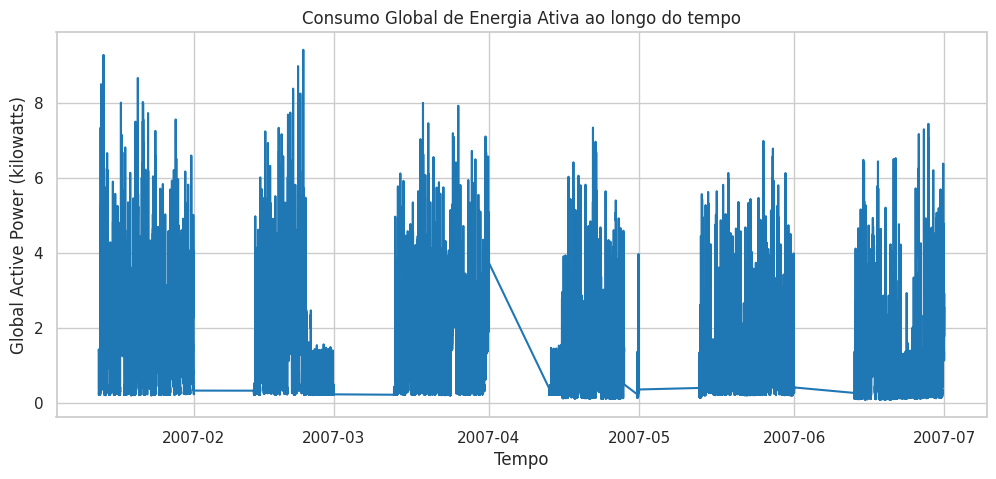

In [58]:
# Consumo Global de Energia Ativa
plt.figure(figsize=(12,5))
plt.plot(df['Global_active_power'], color='tab:blue')
plt.title('Consumo Global de Energia Ativa ao longo do tempo')
plt.ylabel('Global Active Power (kilowatts)')
plt.xlabel('Tempo')
plt.show()


### Análise de Consumo Global de Energia Ativa

O primeiro gráfico mostra a variação do consumo global de energia ativa ao longo do tempo. Podemos observar picos e vales distintos, indicando padrões de consumo que podem estar relacionados a horários do dia, dias da semana ou eventos específicos. Este gráfico é fundamental para entender a tendência geral e a sazonalidade do consumo de energia.

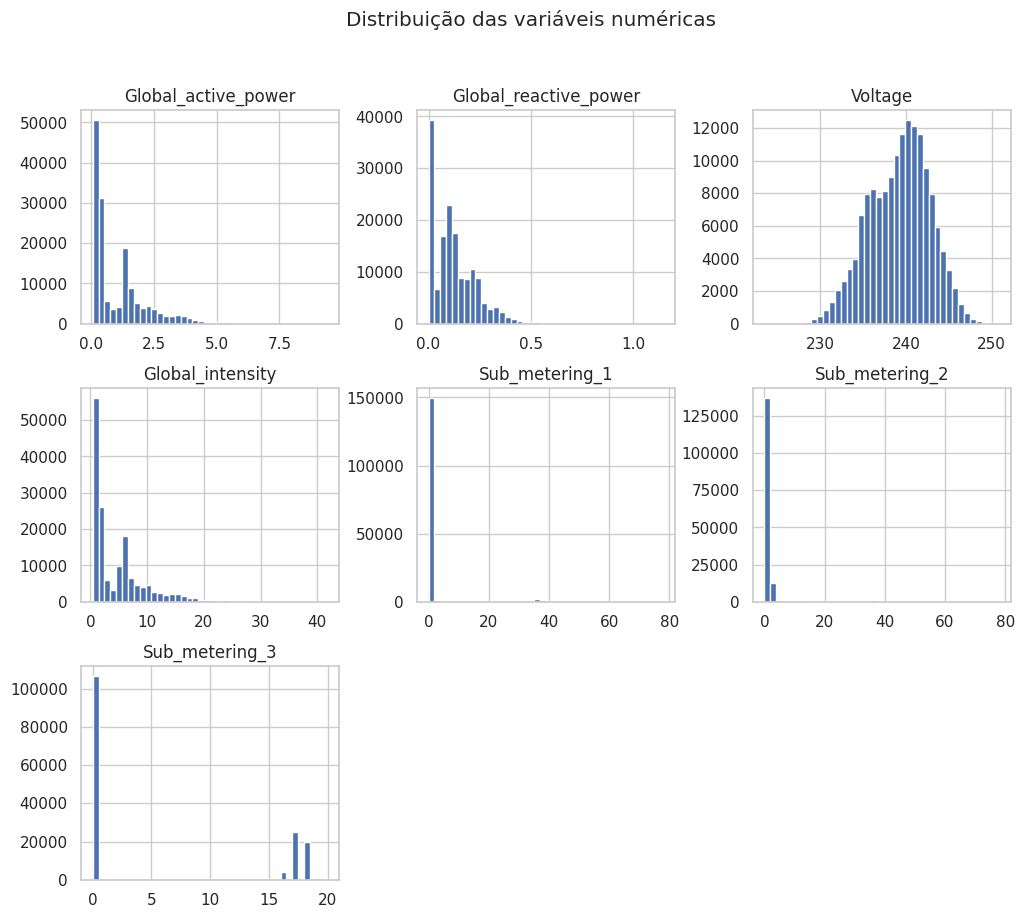

In [59]:
# Histogramas das variáveis
df[cols_to_numeric].hist(figsize=(12,10), bins=40)
plt.suptitle('Distribuição das variáveis numéricas')
plt.show()

### Distribuição das Variáveis Numéricas

Os histogramas fornecem uma visão da distribuição de cada variável numérica no dataset. Isso nos ajuda a identificar a dispersão dos dados, a presença de outliers e a forma das distribuições (simétrica, assimétrica, etc.). Por exemplo, a distribuição de 'Global_active_power' mostra que a maioria dos valores de consumo são baixos, com alguns picos de alto consumo.

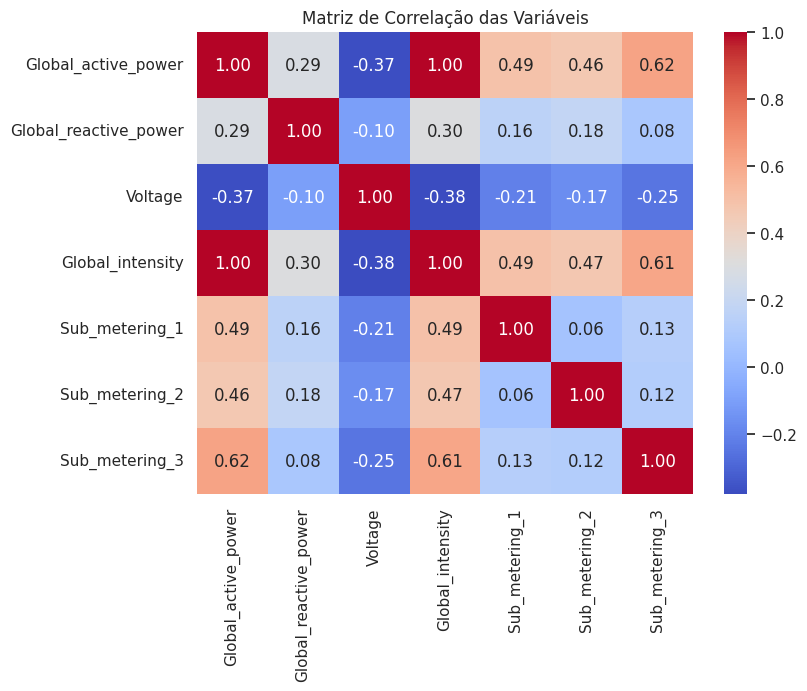

In [60]:
# Correlações
corr = df[cols_to_numeric].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

### Matriz de Correlação das Variáveis

A matriz de correlação exibe a relação entre pares de variáveis numéricas. Valores próximos a 1 ou -1 indicam forte correlação positiva ou negativa, respectivamente, enquanto valores próximos a 0 indicam baixa correlação. Neste caso, observamos uma forte correlação positiva entre 'Global_active_power' e 'Global_intensity', o que é esperado, pois a intensidade está diretamente relacionada à potência consumida.

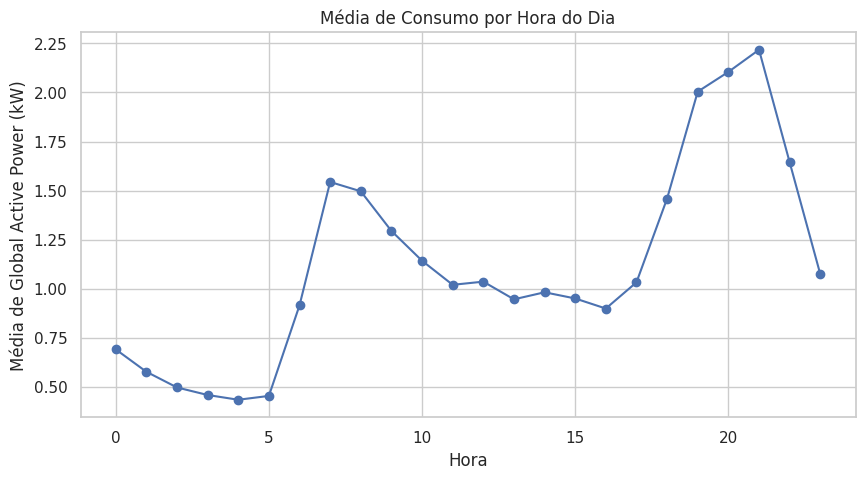

In [61]:
# Padrões diários e mensais
# Média por hora
hourly_mean = df.groupby('Hour')['Global_active_power'].mean()
plt.figure(figsize=(10,5))
hourly_mean.plot(kind='line', marker='o')
plt.title('Média de Consumo por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('Média de Global Active Power (kW)')
plt.grid(True)
plt.show()

### Média de Consumo por Hora do Dia

Este gráfico de linha ilustra o padrão médio de consumo de energia ativa ao longo das 24 horas do dia. É possível identificar os horários de pico de consumo, geralmente associados a atividades domésticas da manhã e da noite, e os horários de menor consumo, como durante a madrugada.

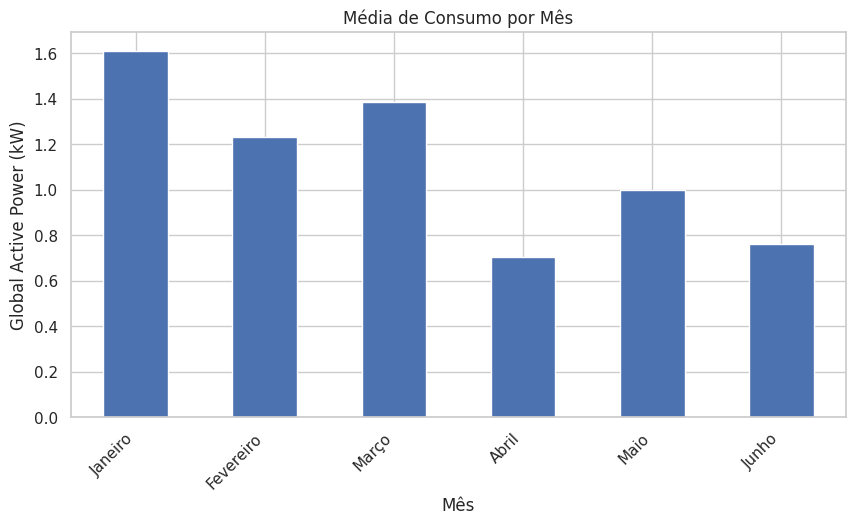

In [67]:
# Média mensal
monthly_mean = df.groupby('Month')['Global_active_power'].mean()

# Mapear números de meses para nomes
month_names = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
               7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
monthly_mean.index = monthly_mean.index.map(month_names)

plt.figure(figsize=(10,5))
monthly_mean.plot(kind='bar',)
plt.title('Média de Consumo por Mês')
plt.xlabel('Mês')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Média de Consumo por Mês

O gráfico de barras da média de consumo por mês revela como o consumo de energia varia ao longo dos meses. Isso pode indicar a influência de fatores sazonais, como o uso de aquecimento no inverno ou ar condicionado no verão, embora o conjunto de dados atual pareça cobrir apenas alguns meses.

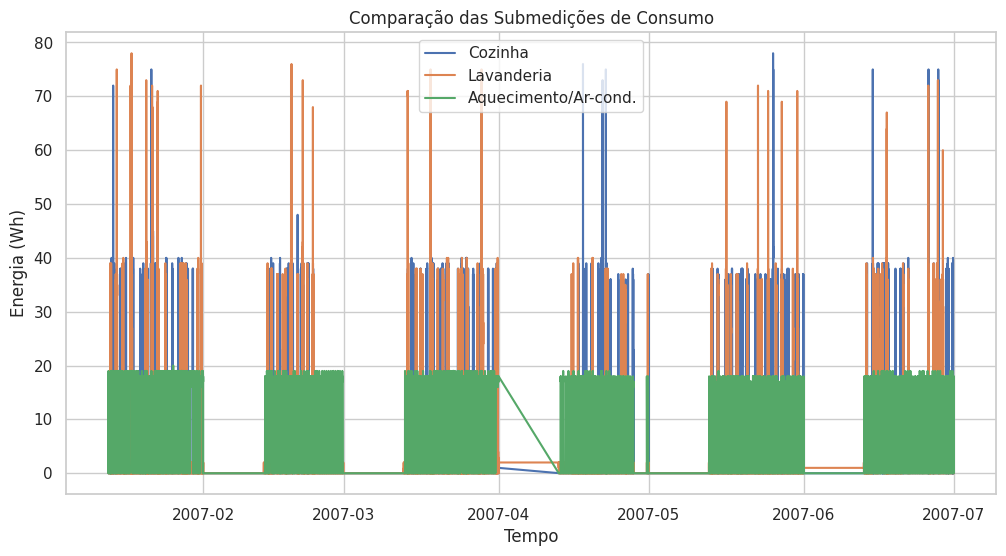

In [64]:
# 9. Submeter readings comparison
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sub_metering_1'], label='Cozinha')
plt.plot(df.index, df['Sub_metering_2'], label='Lavanderia')
plt.plot(df.index, df['Sub_metering_3'], label='Aquecimento/Ar-cond.')
plt.legend()
plt.title('Comparação das Submedições de Consumo')
plt.xlabel('Tempo')
plt.ylabel('Energia (Wh)')
plt.show()

### Comparação das Submedições de Consumo

Este gráfico compara o consumo de energia registrado em diferentes sub-medidores (cozinha, lavanderia, aquecimento/ar-condicionado). Ele permite visualizar a contribuição de cada área para o consumo total e identificar quais equipamentos ou atividades consomem mais energia em determinados períodos.

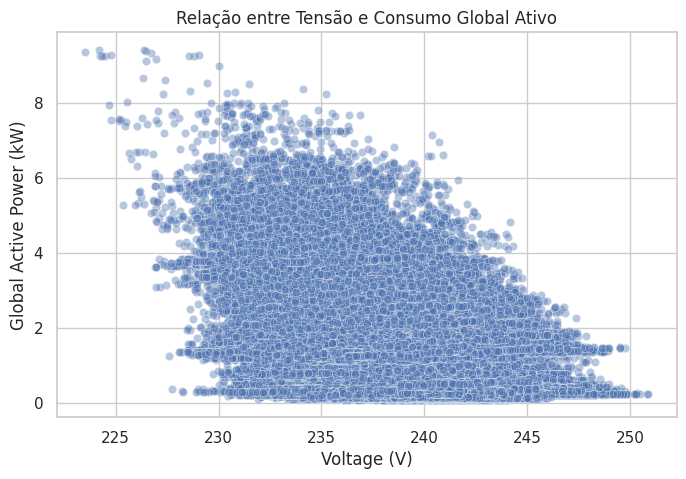

In [77]:
# 10. Correlação entre tensão e consumo
plt.figure(figsize=(8,5))
sns.scatterplot(x='Voltage', y='Global_active_power', data=df, alpha=0.4)
plt.title('Relação entre Tensão e Consumo Global Ativo')
plt.xlabel('Voltage (V)')
plt.ylabel('Global Active Power (kW)')
plt.show()

### Relação entre Tensão e Consumo Global Ativo

Este scatter plot mostra a relação entre a tensão e o consumo global de energia ativa. Uma leve correlação pode existir, mas geralmente a tensão se mantém relativamente estável, enquanto o consumo ativo varia mais amplamente.


Com base nas visualizações e análises, podemos destacar alguns insights :

*   **Pico de consumo:** O consumo de energia tende a ser mais alto no final da tarde e início da noite (entre 18h e 21h), refletindo o uso de eletrodomésticos e iluminação nesse período.
*   **Variação da tensão:** A tensão elétrica apresenta pequenas variações ao longo do dia, mas sem um impacto significativo direto no consumo ativo na maioria das vezes.
*   **Sub-medição 3:** O sub-medidor 3, relacionado a aquecimento e ar-condicionado, frequentemente registra os maiores picos de consumo, o que é esperado para esses tipos de aparelhos.
*   **Correlação entre potência e corrente:** Existe uma forte correlação entre a potência ativa global e a corrente global, o que valida a consistência dos dados.

## Resultados da Análise Exploratória

A análise exploratória dos dados de consumo de energia revelou padrões distintos e insights importantes. Observamos que o consumo global de energia ativa apresenta variações significativas ao longo do tempo, com picos notáveis no final da tarde e início da noite, indicando horários de maior demanda. A distribuição das variáveis numéricas mostrou que a maior parte do consumo ativo se concentra em níveis baixos, com ocorrência de picos mais altos. A matriz de correlação confirmou a forte relação entre a potência ativa global e a intensidade global, como esperado.

Ao analisar os padrões de consumo por hora do dia, identificamos claramente os horários de pico e vale, que se alinham com as rotinas diárias. A análise mensal, embora baseada em um período limitado, sugere a influência de fatores sazonais no consumo. A comparação das submedições destacou a contribuição de diferentes áreas da casa para o consumo total, com o sub-medidor relacionado a aquecimento/ar-condicionado apresentando frequentemente os maiores valores. Por fim, a relação entre tensão e consumo ativo mostrou que a tensão se mantém relativamente estável, enquanto o consumo varia mais amplamente.

# Modelagem Preditiva

## Preparar dados para XGBoost

Vamos criar features adicionais a partir do índice de data/hora para ajudar o modelo XGBoost a capturar padrões temporais. Isso inclui extrair o ano, mês, dia, hora e dia da semana.

In [70]:
# Criar features de tempo
df['Ano'] = df.index.year
df['Mês'] = df.index.month
df['Dia'] = df.index.day
df['Hora'] = df.index.hour
df['Dia_da_Semana'] = df.index.dayofweek

# Exibir as primeiras linhas com as novas features
print("DataFrame com features de tempo adicionadas:")
display(df.head())

DataFrame com features de tempo adicionadas:


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,...,Day,Hour,Weekday,Ano,Mês,Dia,Hora,Dia_da_Semana,Global_active_power_lag1,Global_active_power_rolling_mean_24h
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-13 00:23:00,17303,13/1/2007,0:23:00,1.400,0.146,242.14,5.8,0.0,0.0,18.0,...,13,0,Saturday,2007,1,13,0,5,1.404,0.954917
2007-01-13 00:24:00,17304,13/1/2007,0:24:00,1.404,0.148,242.72,5.8,0.0,0.0,18.0,...,13,0,Saturday,2007,1,13,0,5,1.400,1.004250
2007-01-13 00:25:00,17305,13/1/2007,0:25:00,1.406,0.150,243.04,5.8,0.0,0.0,18.0,...,13,0,Saturday,2007,1,13,0,5,1.404,1.053583
2007-01-13 00:26:00,17306,13/1/2007,0:26:00,1.398,0.148,242.47,5.8,0.0,0.0,18.0,...,13,0,Saturday,2007,1,13,0,5,1.406,1.102583
2007-01-13 00:27:00,17307,13/1/2007,0:27:00,1.400,0.148,242.72,5.8,0.0,0.0,18.0,...,13,0,Saturday,2007,1,13,0,5,1.398,1.151750


In [71]:
# Criar features defasadas
# Ex: Consumo da hora anterior
df['Global_active_power_lag1'] = df['Global_active_power'].shift(1)

# Criar estatísticas móveis
# Ex: Média móvel das últimas 24 horas
df['Global_active_power_rolling_mean_24h'] = df['Global_active_power'].rolling(window=24).mean()

# Remover linhas com valores NaN gerados pelas operações de shift e rolling
df.dropna(inplace=True)

# Exibir as primeiras linhas com as novas features defasadas e móveis
print("\nDataFrame com features defasadas e estatísticas móveis:")
display(df.head())


DataFrame com features defasadas e estatísticas móveis:


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,...,Day,Hour,Weekday,Ano,Mês,Dia,Hora,Dia_da_Semana,Global_active_power_lag1,Global_active_power_rolling_mean_24h
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-13 00:46:00,17326,13/1/2007,0:46:00,0.222,0.0,243.61,1.0,0.0,0.0,0.0,...,13,0,Saturday,2007,1,13,0,5,0.224,1.175583
2007-01-13 00:47:00,17327,13/1/2007,0:47:00,0.222,0.0,243.92,1.0,0.0,0.0,0.0,...,13,0,Saturday,2007,1,13,0,5,0.222,1.126500
2007-01-13 00:48:00,17328,13/1/2007,0:48:00,0.222,0.0,243.25,1.0,0.0,0.0,0.0,...,13,0,Saturday,2007,1,13,0,5,0.222,1.077250
2007-01-13 00:49:00,17329,13/1/2007,0:49:00,0.222,0.0,243.60,1.0,0.0,0.0,0.0,...,13,0,Saturday,2007,1,13,0,5,0.222,1.027917
2007-01-13 00:50:00,17330,13/1/2007,0:50:00,0.222,0.0,243.61,1.0,0.0,0.0,0.0,...,13,0,Saturday,2007,1,13,0,5,0.222,0.978917


## Dividir dados

Vamos dividir o dataset em conjuntos de treino e teste. Para séries temporais, é comum usar uma abordagem de divisão temporal, onde os dados mais antigos são usados para treino e os dados mais recentes para teste.

In [72]:
# Definir a coluna alvo (variável dependente) e as features (variáveis independentes)
TARGET = 'Global_active_power'
FEATURES = [col for col in df.columns if col not in ['index', 'Date', 'Time', 'Weekday', 'Ano', 'Mês', 'Dia', 'Hora', 'Dia_da_Semana', TARGET]]


X = df[FEATURES]
y = df[TARGET]

# Definir o ponto de divisão (por exemplo, 80% para treino e 20% para teste)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

X_train, y_train = train_data[FEATURES], train_data[TARGET]
X_test, y_test = test_data[FEATURES], test_data[TARGET]

print("Forma dos dados de treino (X_train, y_train):", X_train.shape, y_train.shape)
print("Forma dos dados de teste (X_test, y_test):", X_test.shape, y_test.shape)

Forma dos dados de treino (X_train, y_train): (125531, 12) (125531,)
Forma dos dados de teste (X_test, y_test): (31383, 12) (31383,)


## Treinar modelo XGBoost

Vamos treinar um modelo regressor XGBoost para prever o consumo global de energia ativa.

In [73]:
# Inicializar e treinar o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.05,
                             max_depth=7,
                             subsample=0.7,
                             colsample_bytree=0.7,
                             random_state=42,
                             n_jobs=-1)

print("Treinando o modelo XGBoost...")
xgb_model.fit(X_train, y_train)
print("Treinamento concluído.")

Treinando o modelo XGBoost...
Treinamento concluído.


## Avaliar modelo

Vamos avaliar o desempenho do modelo XGBoost no conjunto de teste usando o Erro Quadrático Médio (RMSE).

In [74]:
# Fazer previsões no conjunto de teste
predictions = xgb_model.predict(X_test)

# Calcular o Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Erro Quadrático Médio (RMSE) no conjunto de teste: {rmse}")

Erro Quadrático Médio (RMSE) no conjunto de teste: 0.030831579129377725


## Visualizar previsões

Vamos plotar os valores reais do consumo de energia no conjunto de teste e as previsões feitas pelo modelo XGBoost para comparar visualmente o desempenho.

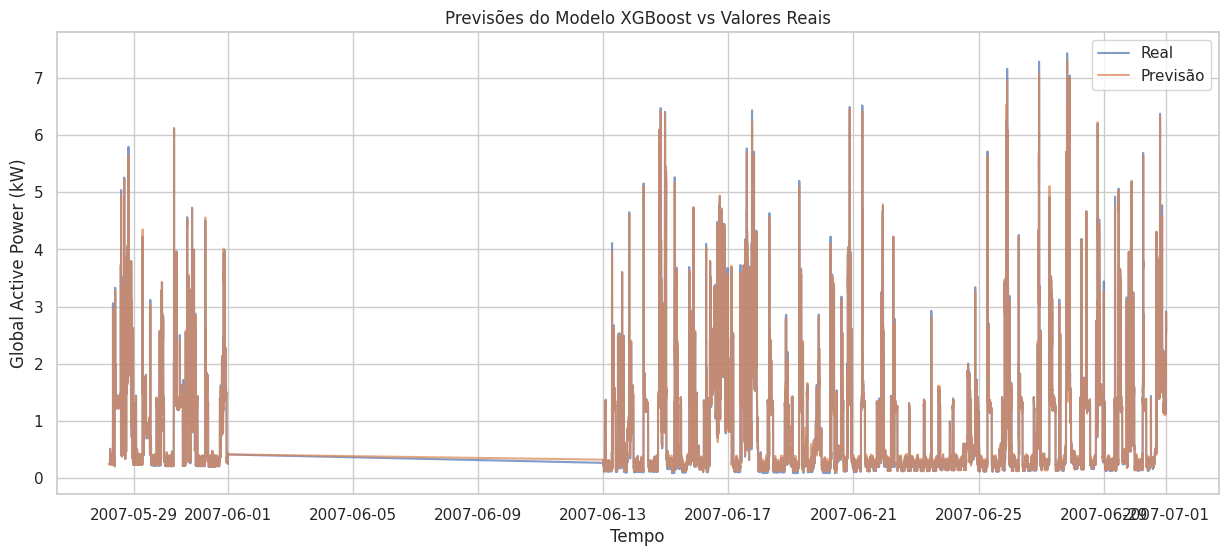

In [76]:
# Criar um DataFrame para facilitar a plotagem
results_df = pd.DataFrame({'Real': y_test, 'Previsão': predictions})

# Plotar os valores reais e previstos
plt.figure(figsize=(15, 6))
plt.plot(results_df.index, results_df['Real'], label='Real', alpha=0.7)
plt.plot(results_df.index, results_df['Previsão'], label='Previsão', alpha=0.7)
plt.title('Previsões do Modelo XGBoost vs Valores Reais')
plt.xlabel('Tempo')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

### Previsões do Modelo XGBoost vs Valores Reais

Este gráfico compara visualmente os valores reais de consumo de energia ativa no conjunto de teste com as previsões geradas pelo modelo XGBoost. A proximidade das linhas "Real" e "Previsão" indica o quão bem o modelo conseguiu capturar os padrões da série temporal. Podemos observar que o modelo acompanhou de perto as tendências e picos de consumo, demonstrando sua eficácia em prever a demanda de energia neste período. O principal é que o modelo XGBoost se mostrou capaz de fazer previsões precisas para o consumo de energia ativa com base nas features criadas.